In [1]:
##importing  required libraries


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#loading dataset

df = pd.read_csv('../datasets/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

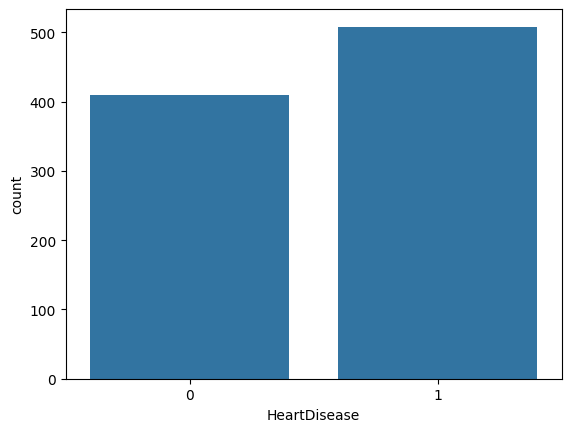

In [4]:
#checking target balance

df['HeartDisease'].value_counts()
sns.countplot(x='HeartDisease',data=df)
plt.show

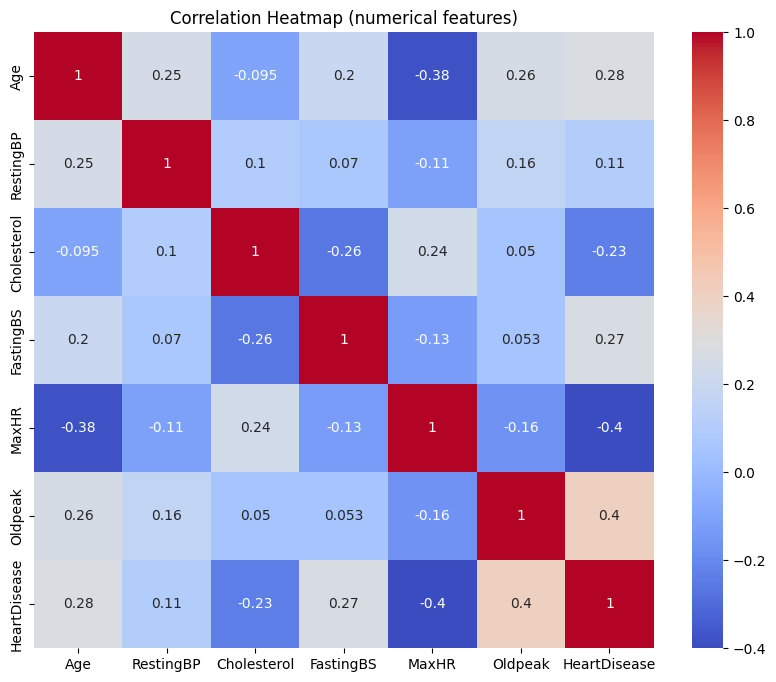

In [6]:
# correlation heatmap


plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (numerical features)")
plt.show()

In [7]:
#split features and target

X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [9]:
# categorical and numerical splitting

cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

cat_cols , num_cols


(Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'),
 Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object'))

In [10]:
#One-hot encoding

X_encoded = pd.get_dummies(X, columns=cat_cols , drop_first=True)
X_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True


In [11]:
X_train,X_test,y_train,y_test = train_test_split (
    X_encoded,y,test_size=0.2,stratify=y, random_state=42
)

In [13]:
# standardization

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

In [14]:
# logistic regression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled,y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy: ", accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy:  0.8858695652173914
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [15]:
# Random forest

rf = RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy: ",accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest Accuracy:  0.8804347826086957
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        82
           1       0.89      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [16]:

sample_input = X_test.iloc[0:1]

prob = lr.predict_proba(sample_input)[0][1]
pred = lr.predict(sample_input)[0]

print("Prediction:", pred)
print("Probability of Heart Disease:", prob)


Prediction: 0
Probability of Heart Disease: 6.101551046873802e-07


In [17]:
# risk calculation

def get_risk_level(prob):
    if prob < 0.3:
        return "Low"
    elif prob < 0.7:
        return "Medium"
    else:
        return "High"

print("Risk Level:", get_risk_level(prob))


Risk Level: Low


In [18]:
#saving model

import pickle

with open('../models/heart_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

with open('../models/heart_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('../models/heart_columns.pkl', 'wb') as f:
    pickle.dump(X_train_scaled.columns.tolist(), f)

print("Heart model, scaler, and columns saved!")




Heart model, scaler, and columns saved!
